In [105]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.datasets import load_boston
boston=load_boston()
bos=pd.DataFrame(boston.data)

In [106]:
#observation Of Data
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [107]:
#Getting names of features from boston data
bos.columns=boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [108]:
#Target value is missing from data.Create new column with target value and add to dataframe
bos['price']=boston.target

# DataPreprocesssing

In [109]:
#Checking for missing values from all columns
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [110]:
#since there are no null values in any column.no need of handeling of missing values

# Data visualization

C:\Users\kbhar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


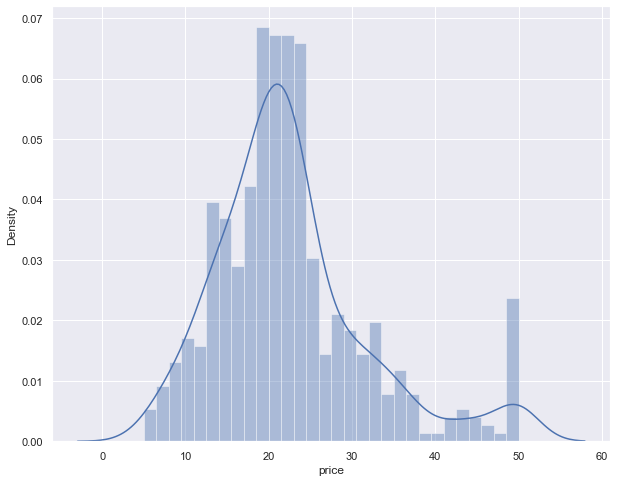

In [111]:
sns.set(rc={'figure.figsize':(10,8)})

# plot a histogram showing the distribution of the target values
sns.distplot(bos['price'], bins=30)
plt.show()

# Correlation

In [112]:
#Finding correlation between features
correlation_mat=bos.corr().round(2)

<AxesSubplot:>

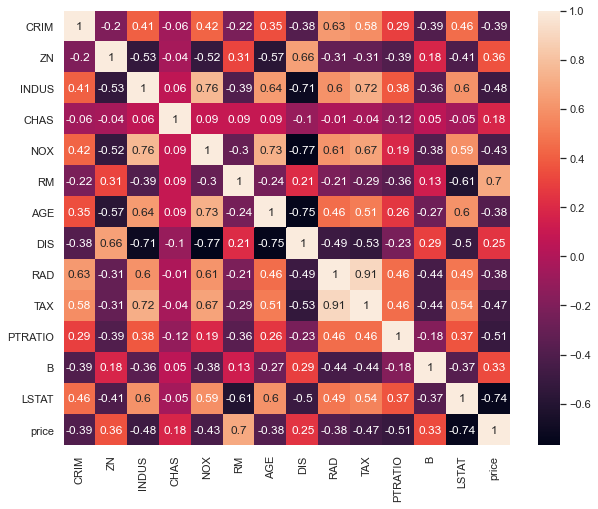

In [113]:
#Plotting correlation matrix using heatmap
sns.heatmap(data=correlation_mat,annot=True)

# Observations
1.From above correlation plot we can see that price is highly correlated to LSTAT,RM
2.RAD,TAX are strongly correlated to each other so we can drop them to avoid multicollinearity.

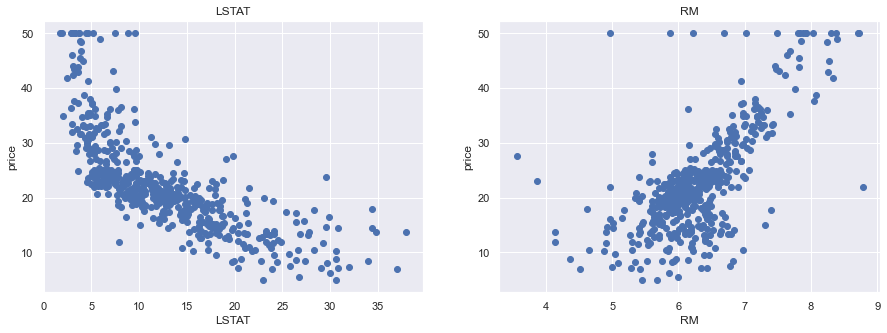

In [114]:
 plt.figure(figsize=(15, 5))

features = ['LSTAT', 'RM']
target = bos['price']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = bos[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('price')

# preparation of data for training

In [115]:
X = pd.DataFrame(np.c_[bos['LSTAT'], bos['RM']], columns = ['LSTAT','RM'])
Y = bos['price']

In [116]:
#split data into training and test set

In [118]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


# Training the model

In [119]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score
lin_model=LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

# Model evaluation for training set

In [120]:
Y_train_predict=lin_model.predict(X_train)
rmse=(np.sqrt(mean_squared_error(Y_train,Y_train_predict)))
r2=r2_score(Y_train,Y_train_predict)
print("Model performance for training set")
print("RMSE is {}".format(rmse))
print("R2 score is {}".format(r2))

Model performance for training set
RMSE is 5.637129335071195
R2 score is 0.6300745149331701


# Model evaluation for testing set

In [121]:
Y_test_predict=lin_model.predict(X_test)
rmse=(np.sqrt(mean_squared_error(Y_test,Y_test_predict)))
r2=r2_score(Y_test,Y_test_predict)
print("Model performance for testing set")
print("RMSE is {}".format(rmse))
print("R2 square is {}".format(r2))

Model performance for testing set
RMSE is 5.137400784702911
R2 square is 0.6628996975186954


# plotting Y_test  Vs Y_predict

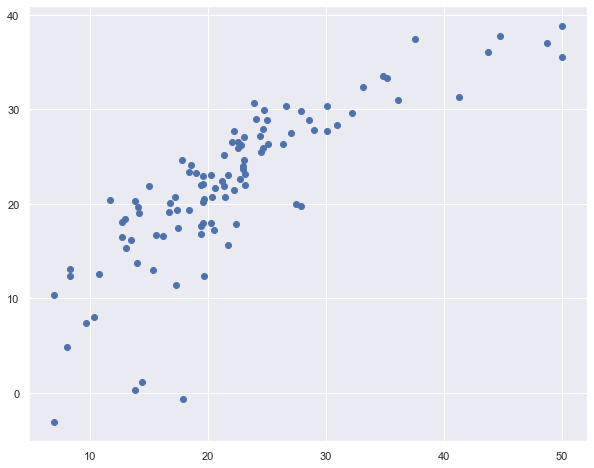

In [122]:
plt.scatter(Y_test,Y_test_predict)
plt.show()